### Entrenamiento de la Red Neuronal convolucional para reconocimiento facial

In [1]:
import numpy as np
from skimage.io import imread_collection , concatenate_images
import matplotlib.pyplot as plt
import copy  as cp
import copy
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.utils.multiclass import unique_labels

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Flatten,Dropout
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import to_categorical

In [3]:
folderMiguel = 'Data/Miguel/*.jpg'
folderOthers = 'Data/Desconocido/*.jpg'

In [4]:
# Cargando datos 
imagesMiguel = imread_collection(folderMiguel)
imagesOthers = imread_collection(folderOthers) 

#Cantidad de imagenes
nMiguel  = len(imagesMiguel)
nOthers = len(imagesOthers)

# union de los datos
images = np.append(imagesMiguel, imagesOthers, axis=0)

print("Total de imagenes: ",len(images))

Total de imagenes:  18000


(150, 150, 3)


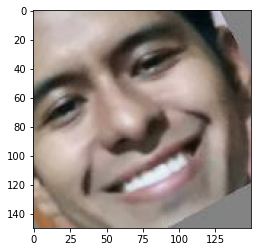

In [5]:
plt.imshow(images[0])
print(images[0].shape)

In [6]:
def Create_Y():
     return [0]*nMiguel + [1]*nOthers
Y = Create_Y()

Y = np.array(Y)
X = np.array(images)

(64, 64, 3)


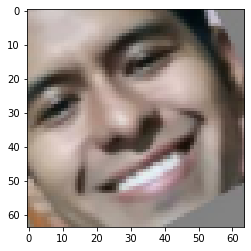

In [7]:
from skimage.transform import resize
X=resize(X,(len(images),64,64,3))

plt.imshow(X[0])
print(X[0].shape)

In [14]:
modelo=Sequential() 

modelo.add(Conv2D(200,(3,3),input_shape=X.shape[1:]))
modelo.add(Activation('relu'))
modelo.add(MaxPooling2D(pool_size=(2,2)))

modelo.add(Conv2D(100,(3,3)))
modelo.add(Activation('relu'))
modelo.add(MaxPooling2D(pool_size=(2,2)))

modelo.add(Conv2D(50,(3,3)))
modelo.add(Activation('relu'))
modelo.add(MaxPooling2D(pool_size=(2,2)))

modelo.add(Flatten()) 
modelo.add(Dropout(0.5)) 

modelo.add(Dense(50,activation='relu'))
modelo.add(Dense(2,activation='softmax')) 

modelo.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [16]:
Y=to_categorical(Y)

Y[0]

array([1., 0.], dtype=float32)

In [17]:
Y[len(Y)-1]

array([0., 1.], dtype=float32)

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 0)

In [19]:
#Guardamos nuestro modelo entrenado en una carpeta
checkpoint = ModelCheckpoint('CNN/model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')

In [20]:
history=modelo.fit(X_train,Y_train,epochs=20,callbacks=[checkpoint],validation_split=0.2) #,shuffle = True)

Epoch 1/20
315/315 [==============================] - ETA: 0s - loss: 0.2357 - accuracy: 0.9127WARNING:tensorflow:From C:\Users\heloj\anaconda3\lib\site-packages\tensorflow\python\training\tracking\tracking.py:111: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: CNN\model-001.model\assets
315/315 [==============================] - 165s 525ms/step - loss: 0.2357 - accuracy: 0.9127 - val_loss: 0.0935 - val_accuracy: 0.9639
Epoch 2/20
315/315 [==============================] - 164s 519ms/step - loss: 0.0825 - accuracy: 0.9699 - val_loss: 0.0592 - val_accuracy: 0.9790
Epoch 3/20
315/315 [==============================] - 170s 540ms/step - loss: 0.0621 -

----------------------------

## Desempeño

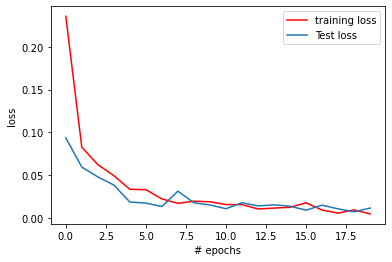

In [22]:
plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='Test loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

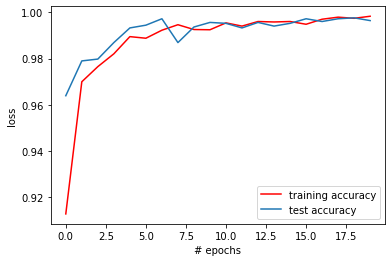

In [23]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='test accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()